In [1]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

In [6]:
mapa = {
    "unfinished": "nao_finalizado",
    "expected_hours": "horas_esperadas",
    "price": "preco"

}
dados = dados.rename(columns=mapa)

In [8]:
troca = {
    0: 1,
    1: 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)

In [10]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


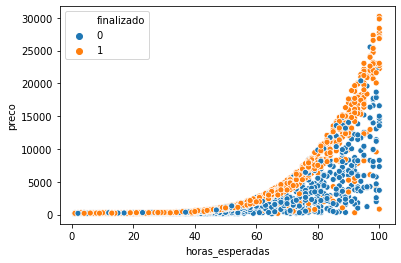

In [13]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=dados)

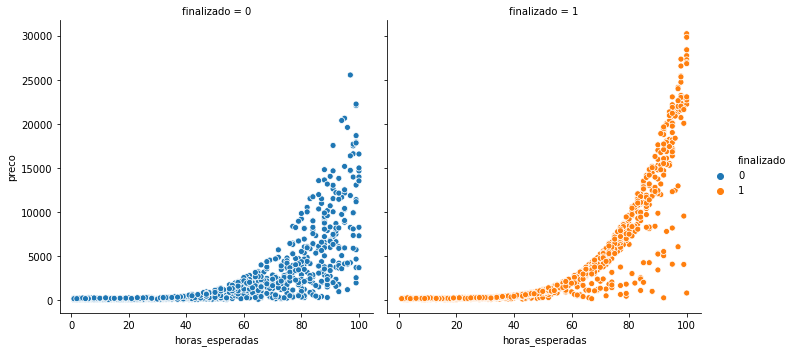

In [15]:
sns.relplot(x='horas_esperadas', y='preco', col='finalizado', hue='finalizado', data=dados)

In [17]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


Treinaremos com 1617 elementos e testaremos com 540 elementos.
Acuracia: 52.59%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [74]:
SEED = 5
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, 
                                                        random_state = SEED,
                                                        stratify = y,
                                                        test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos." %(len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print("Acuracia: %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos.
Acuracia: 57.22%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [75]:
import numpy as np
previsoes_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_base) * 100

print("Acuracia de baseline: %.2f%%" % acuracia)

Acuracia de baseline: 52.59%


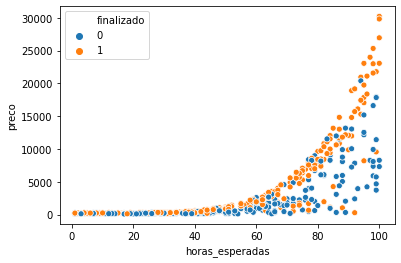

In [76]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)

In [77]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [78]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [79]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [80]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

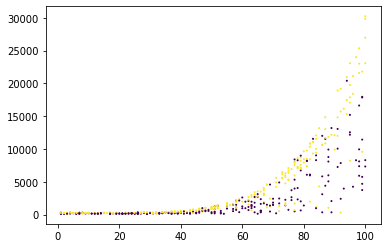

In [81]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

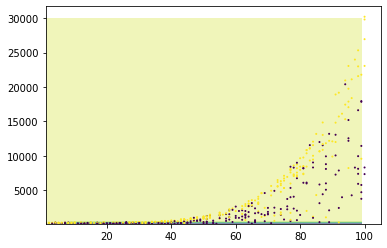

In [82]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)